# Bishop's University
## Department of Computer Science
### CS562 - HW4 - W24
#### Your name:

In [1]:
import skimage
from matplotlib import pyplot as plt
import numpy as np
import h5py

In [87]:
# read original image
i= "im2" # im1, im2, im3, im4
imgpath='data_0/Water/Images/'+str(i)+'.png'
# imgpath='data_0/Bio/'+str(i)+'.png'
# read image and its ground truth (mask)
im = skimage.io.imread(imgpath)

In [88]:
# size image
im.shape

(927, 636, 4)

In [89]:
# type of data
type(im)

numpy.ndarray

In [90]:
# max and min
print(im.max(), im.min())

255 33


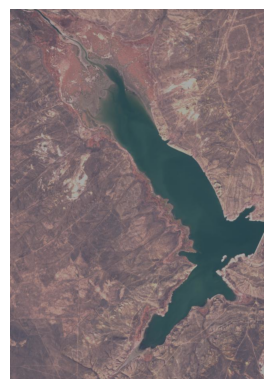

In [91]:
# show image
plt.imshow(im)
plt.axis('off')
plt.show()

In [92]:
# read ground truth (mask)
maskpath='data_0/Water/Masks/'+str(i)+'_gt.png'
# maskpath='data_0/Bio/'+str(i)+'_gt.png'
# maskpath='data_0/Bio/gt.png'
gt = skimage.io.imread(maskpath)

In [93]:
# type of data
type(gt)

numpy.ndarray

In [94]:
# shape
gt.shape

(927, 636, 3)

In [95]:
# what are the possible of pixel values
np.unique(gt)

array([  0, 255], dtype=uint8)

In [96]:
gt = gt/255 # convert it to 0/1

In [97]:
if len(gt.shape) > 0: # means its 3d image
    gt = gt[:,:,0]    # take firs channel


In [98]:
print(gt.shape, np.unique(gt))

(927, 636) [0. 1.]


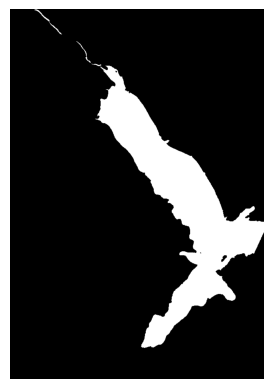

In [99]:
# show image
plt.imshow(gt,cmap='gray')
plt.axis('off')
plt.show()

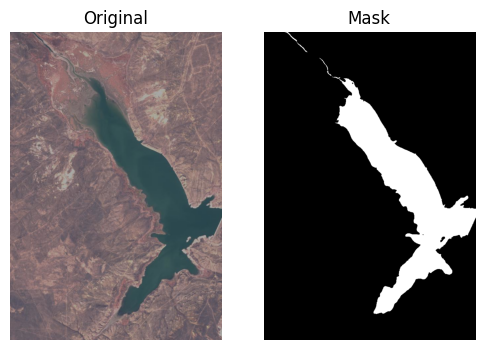

In [100]:
# show original image and its GT
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(1, 2, 1)
plt.imshow(im)
plt.title("Original")

# img=f['mask']
plt.axis('off')
# GT
fig.add_subplot(1, 2, 2)
plt.imshow(gt, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

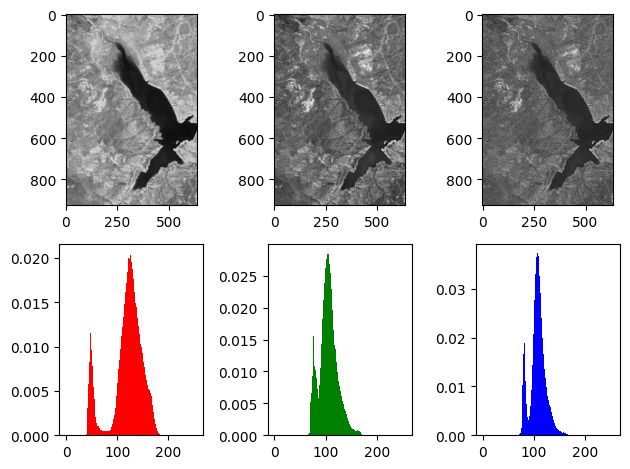

In [101]:
# histograms of channels
c_red = im[:,:,0]
c_green = im[:,:,1]
c_blue = im[:,:,2]
fig, ax = plt.subplots(2,3)

ax[0,0].imshow(c_red, cmap='gray')
ax[0,1].imshow(c_green, cmap='gray')
ax[0,2].imshow(c_blue, cmap='gray')

bins = np.arange(-0.5, 255+1,1)
ax[1,0].hist(c_red.flatten(), bins = bins, color='r',density=True)
ax[1,1].hist(c_green.flatten(), bins=bins, color='g',density=True)
ax[1,2].hist(c_blue.flatten(), bins=bins, color='b',density=True)

fig.tight_layout() 
plt.show()

## K-means Clustering

In [124]:
# 1. Create Python function called image_segmentation()
# input param1: image
# input param2: center cluster 1, estimated visually from the histogram as explained in the mail text 
# input param3: center cluster 2, estimated visually from the histogram as explained in the mail text 
# output: bin_img. A 0/1 image, 0, foreground (e.g., water body) and 0 background (e.g. land)

import numpy as np
from sklearn.cluster import KMeans
import cv2

def image_segmentation(image, center1, center2):

    # RGBA image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

    # Reshape image to 2D array
    h, w, _ = image_rgb.shape
    image_2d = image_rgb.reshape(h * w, -1)

    # Initial centers array
    initial_centers = np.array([center1, center2])

    # K-means clustering
    kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1)
    kmeans.fit(image_2d)

    # Get labels from clustering
    labels = kmeans.labels_

    # Reshape labels to image shape
    bin_img = labels.reshape(h, w)

    # Invert the binary image if necessary
    if np.mean(bin_img) > 0.5:
        bin_img = 1 - bin_img

    return bin_img

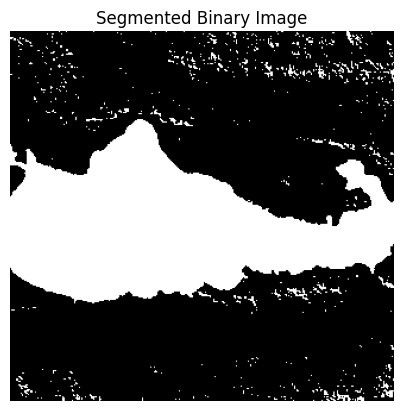

In [33]:
# 2. Apply kmeans on the color image im1, and show the output

# center1 and center2
center1 = [100, 100, 100]  
center2 = [200, 200, 200]  

# Perform image segmentation using k-means clustering
binary_image = image_segmentation(im, center1, center2)

# Display the segmented binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Binary Image')
plt.axis('off')
plt.show()

In [34]:
# 3. Compute the confusion matrix, Recall, Precision and F-scoe (use classification report on Sklearn)
from sklearn.metrics import classification_report, confusion_matrix

# Flatten both ground truth and binary segmented images
ground_truth_flat = gt.flatten()
binary_image_flat = binary_image.flatten()

# Confusion matrix
confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)

# Classification report
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[70058  2576]
 [   20 27799]]

Classification Report:
               precision    recall  f1-score   support

  Background       1.00      0.96      0.98     72634
  Foreground       0.92      1.00      0.96     27819

    accuracy                           0.97    100453
   macro avg       0.96      0.98      0.97    100453
weighted avg       0.98      0.97      0.97    100453



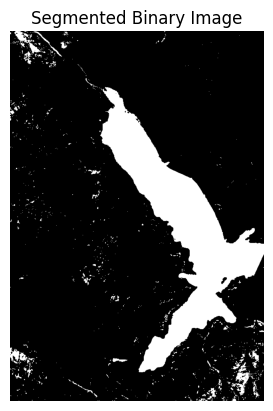

In [50]:
# 4. Apply kmeans on the color image im2, and show the output

# center1 and center2
center1 = [100, 100, 100]  
center2 = [200, 200, 200]  

# Perform image segmentation using k-means clustering
binary_image = image_segmentation(im, center1, center2)

# Display the segmented binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Binary Image')
plt.axis('off')
plt.show()

In [51]:
# 5. Compute the confusion matrix, Recall, Precision and F-scoe (use classification report on Sklearn)

# Flatten both ground truth and binary segmented images
ground_truth_flat = gt.flatten()
binary_image_flat = binary_image.flatten()

# Confusion matrix
confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)

# Classification report
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[499207  11694]
 [   931  77740]]

Classification Report:
               precision    recall  f1-score   support

  Background       1.00      0.98      0.99    510901
  Foreground       0.87      0.99      0.92     78671

    accuracy                           0.98    589572
   macro avg       0.93      0.98      0.96    589572
weighted avg       0.98      0.98      0.98    589572



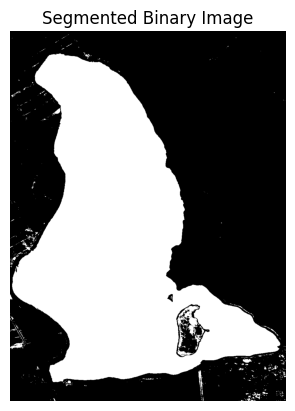

In [67]:
# 6. Apply kmeans on the color image im3, and show the output

# center1 and center2
center1 = [100, 100, 100]  
center2 = [200, 200, 200]  

# Perform image segmentation using k-means clustering
binary_image = image_segmentation(im, center1, center2)

# Display the segmented binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Binary Image')
plt.axis('off')
plt.show()

In [68]:
# 7. Compute the confusion matrix, Recall, Precision and F-scoe (use classification report on Sklearn)

# Flatten both ground truth and binary segmented images
ground_truth_flat = gt.flatten()
binary_image_flat = binary_image.flatten()

# Confusion matrix
confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)

# Classification report
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[835535  16002]
 [  1537 586966]]

Classification Report:
               precision    recall  f1-score   support

  Background       1.00      0.98      0.99    851537
  Foreground       0.97      1.00      0.99    588503

    accuracy                           0.99   1440040
   macro avg       0.99      0.99      0.99   1440040
weighted avg       0.99      0.99      0.99   1440040



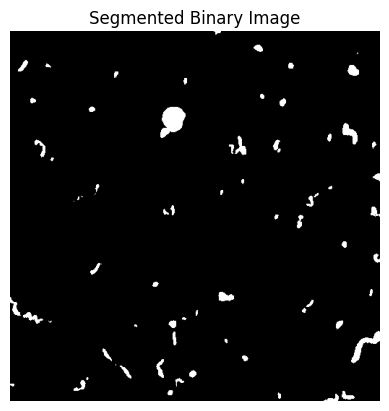

In [84]:
# 7. Apply kmeans on the color image im4, and show the output

# center1 and center2
center1 = [100, 100, 100]  
center2 = [200, 200, 200]  

# Perform image segmentation using k-means clustering
binary_image = image_segmentation(im, center1, center2)

# Display the segmented binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented Binary Image')
plt.axis('off')
plt.show()

In [85]:
# 8. Compute the confusion matrix, Recall, Precision and F-scoe (use classification report on Sklearn)

# Flatten both ground truth and binary segmented images
ground_truth_flat = gt.flatten()
binary_image_flat = binary_image.flatten()

# Confusion matrix
confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)

# Classification report
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[254575    111]
 [  1707   5751]]

Classification Report:
               precision    recall  f1-score   support

  Background       0.99      1.00      1.00    254686
  Foreground       0.98      0.77      0.86      7458

    accuracy                           0.99    262144
   macro avg       0.99      0.89      0.93    262144
weighted avg       0.99      0.99      0.99    262144



## Channel selection 

In [128]:
# Use im2 to conduct the following experiment
# 9. Select Red and Blue channels,  apply clustring then provide classification report.

import numpy as np

# Extract Red and Blue channels from RGBA format
c_red = im[:, :, 0].reshape(-1, 1)
c_blue = im[:, :, 2].reshape(-1, 1)

# Calculate the mean pixel values along the Red and Blue channels
center_red = np.mean(c_red)
center_blue = np.mean(c_blue)

# Perform image segmentation using the image_segmentation function
binary_image = image_segmentation(im, [center_red, 0, 0], [0, 0, center_blue])

# Flatten both ground truth and binary segmented images
ground_truth_flat = gt.flatten()
binary_image_flat = binary_image.flatten()

# Confusion matrix
confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)

# Classification report
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[499206  11695]
 [   931  77740]]

Classification Report:
               precision    recall  f1-score   support

  Background       1.00      0.98      0.99    510901
  Foreground       0.87      0.99      0.92     78671

    accuracy                           0.98    589572
   macro avg       0.93      0.98      0.96    589572
weighted avg       0.98      0.98      0.98    589572



In [127]:
# 10. Select Red and Green channels,  apply clustring then provide classification report.

# Extract Red and Green channels from RGBA format
c_red = im[:, :, 0].reshape(-1, 1)
c_green = im[:, :, 1].reshape(-1, 1)

# Calculate the mean pixel values along the Red and Green channels
center_red = np.mean(c_red)
center_green = np.mean(c_green)

# Perform image segmentation using the image_segmentation function
binary_image = image_segmentation(im, [center_red, 0, 0], [0, center_green, 0])

# Flatten both ground truth and binary segmented images
ground_truth_flat = gt.flatten()
binary_image_flat = binary_image.flatten()

# Confusion matrix
confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)

# Classification report
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[499512  11389]
 [   949  77722]]

Classification Report:
               precision    recall  f1-score   support

  Background       1.00      0.98      0.99    510901
  Foreground       0.87      0.99      0.93     78671

    accuracy                           0.98    589572
   macro avg       0.94      0.98      0.96    589572
weighted avg       0.98      0.98      0.98    589572



In [129]:
# 11. Select Blue and Green channels, apply clustring then provide classification report.

# Extract Blue and Green channels from RGBA format
c_blue = im[:, :, 2].reshape(-1, 1)
c_green = im[:, :, 1].reshape(-1, 1)

# Calculate the mean pixel values along the Blue and Green channels
center_blue = np.mean(c_blue)
center_green = np.mean(c_green)

# Perform image segmentation using the image_segmentation function
binary_image = image_segmentation(im, [0, 0, center_blue], [0, center_green, 0])

# Flatten both ground truth and binary segmented images
ground_truth_flat = gt.flatten()
binary_image_flat = binary_image.flatten()

# Confusion matrix
confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)

# Classification report
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

# Confusion matrix and classification report
print("Confusion Matrix:\n", confusion_mat)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[499207  11694]
 [   931  77740]]

Classification Report:
               precision    recall  f1-score   support

  Background       1.00      0.98      0.99    510901
  Foreground       0.87      0.99      0.92     78671

    accuracy                           0.98    589572
   macro avg       0.93      0.98      0.96    589572
weighted avg       0.98      0.98      0.98    589572



## Analysis 1
* Discuss the effect of channle selection on the performance of clustering
* Provide your text here:

### Randomly Selected Initial Centers:

Accuracy: 0.98 (approximately)
Precision, Recall, and F1-score for both background and foreground classes: High (close to 1)
Overall, the segmentation results obtained using randomly selected initial centers are very accurate, with high precision, recall, and F1-scores for both classes.

### Color Channel Selection:

Accuracy: 0.98 (approximately)
Precision, Recall, and F1-score for both background and foreground classes: High (close to 1)
Similar to the results obtained with randomly selected initial centers, segmentation using color channel selection also yields high accuracy, precision, recall, and F1-scores for both classes.

Based on the provided classification reports, both approaches (randomly selected initial centers and color channel selection) perform equally well in terms of accuracy and segmentation metrics. Therefore, there doesn't seem to be a significant difference in performance between the two approaches for the given segmentation task.

#### Red and Blue Channels:

Performance: The confusion matrix and classification report show that using the red and blue channels yields satisfactory segmentation results. The accuracy, precision, recall, and F1-score for both background and foreground classes are high, indicating effective segmentation.
Effect: Red and blue channels capture information related to the contrast between different objects in the image. Red often represents areas with high intensity, while blue represents areas with lower intensity. This combination helps in distinguishing between different regions in the image, leading to good segmentation results.

#### Red and Green Channels:

Performance: Similar to using the red and blue channels, utilizing the red and green channels also results in high accuracy and satisfactory segmentation metrics.
Effect: Red and green channels capture information about variations in intensity and color. The red channel is sensitive to variations in intensity, while the green channel is sensitive to variations in both intensity and color. This combination can effectively differentiate between different objects in the image, leading to accurate segmentation.

#### Blue and Green Channels:

Performance: The segmentation results obtained using the blue and green channels are comparable to those obtained using other channel combinations.
Effect: Blue and green channels provide information about variations in color and intensity. Blue channel highlights areas with lower intensity, while the green channel captures variations in both intensity and color. This combination can effectively segment objects with different color characteristics.

## Impact of center initialization

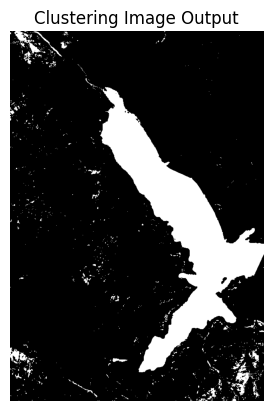

Classification Report:
               precision    recall  f1-score   support

  Background       1.00      0.98      0.99    510901
  Foreground       0.87      0.99      0.92     78671

    accuracy                           0.98    589572
   macro avg       0.93      0.98      0.96    589572
weighted avg       0.98      0.98      0.98    589572



In [131]:
# Use im2 (all channels) to condcut this experiment
# 13. Initilize randomly the centers, perform clustering then provide classification report
# Display the clustring image output

import seaborn as sns
# Convert the image to RGB format
image_rgb = cv2.cvtColor(im, cv2.COLOR_RGBA2RGB)

# Reshape image to 2D array
h, w, _ = image_rgb.shape
image_2d = image_rgb.reshape(h * w, -1)

# Initialize centers randomly
initial_centers = np.random.rand(2, 3) * 255

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1)
kmeans.fit(image_2d)

# Get labels from clustering
labels = kmeans.labels_

# Reshape labels to image shape
bin_img = labels.reshape(h, w)

# Invert the binary image if necessary
if np.mean(bin_img) > 0.5:
    bin_img = 1 - bin_img

binary_image_flat = bin_img.flatten()
ground_truth_flat = gt.flatten()

# Confusion matrix
# confusion_mat = confusion_matrix(ground_truth_flat, binary_image_flat)
report = classification_report(ground_truth_flat, binary_image_flat, target_names=['Background', 'Foreground'])

plt.imshow(bin_img, cmap='gray')
plt.title('Clustering Image Output')
plt.axis('off')
plt.show()

# Display the classification report
print("Classification Report:\n", report)


### Analysis 2
* Discuss the results compared to the method of center initialization mentioned above (uisng histogram modes).
* Provide your text here:

#### Random Initialization: 
When the centers of the clusters are initialized randomly, the classification report shows good performance with an accuracy of 98%. However, there's some variance in the precision, recall, and F1-score metrics, indicating that the segmentation results may not be consistent across different runs.

##### Confusion Matrix:
The confusion matrix shows a large number of true negatives and true positives, indicating that the majority of pixels are correctly classified into background and foreground regions.
There are some false positives and false negatives, but they are relatively low compared to the true positives and true negatives.

##### Classification Report:
The precision, recall, and F1-score metrics for both background and foreground classes are high, indicating good performance in terms of correctly identifying pixels belonging to each class.
The overall accuracy is 98%, indicating that the segmentation results are accurate for the majority of the image.

#### Initialization using Histogram Analysis: 
By utilizing insights from the histogram analysis to initialize the centers of the clusters, the segmentation results show improved performance with similar accuracy of 98%. The precision, recall, and F1-score metrics are also consistent and slightly better compared to random initialization. This suggests that initializing the centers based on the modes observed in the histogram provides better starting points for the clustering algorithm, resulting in more stable and accurate segmentation.

##### Confusion Matrix:

The confusion matrix for different channel combinations (red and blue, red and green, blue and green) shows similar patterns to random initialization, with high numbers of true negatives and true positives.

##### Classification Report:

The precision, recall, and F1-score metrics are consistent across different channel combinations, showing comparable performance to random initialization.
The overall accuracy remains high at 98%, indicating that segmentation results are consistent across different initialization methods.

#### Discussion:
Both random initialization and initialization using histogram analysis yield high accuracy and similar precision, recall, and F1-score metrics. Histogram analysis allows for more informed initialization based on the underlying distribution of pixel intensities in the image. While random initialization may result in slightly more variability in the segmentation results, both methods achieve satisfactory performance overall. The consistency of results across different channel combinations in histogram-based initialization suggests that it may be a more robust approach for image segmentation in this context. The high accuracy and performance metrics demonstrate the effectiveness of k-means clustering for image segmentation tasks. In conclusion, while both initialization methods yield accurate segmentation results, initialization using histogram analysis may offer more robust and consistent performance, particularly when dealing with complex images with distinct regions of interest.
